# Prdicting whether given college is private or not, using K-Means Clustering

In [44]:
#Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#The below line of code %matplotlib inline is a magic command
#in Jupyter notebooks that allows plots to be displayed in 
#the notebook itself instead of opening a separate window. 
get_ipython().run_line_magic('matplotlib', 'inline')


In [90]:
#Reading the data grom colleg.csv file as a dataframe
college_df = pd.read_csv('college.csv', index_col = 0)
college_df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [46]:
college_df.info() #shows information regarding the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [47]:
college_df.describe() #provides a summary of statistical information about college_df dataframe.


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


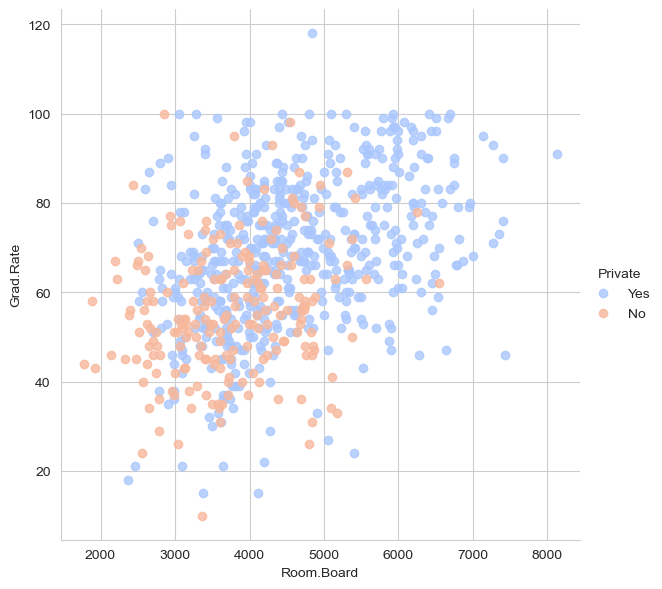

In [48]:
#Creating scatterplot of Grad.Rate versus Room.Board
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board', y='Grad.Rate', data=college_df, hue='Private', palette='coolwarm', height=6, aspect=1, fit_reg=False)


Text(0.5, 1.0, 'Average Graduation Rate by Room & Board Cost and Type of College')

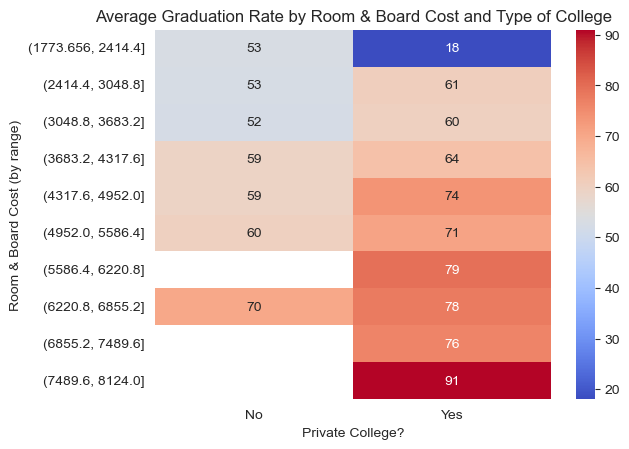

In [49]:
# creating a pivot table with average Grad.Rate for each Room.Board range and type of college
pv_table = pd.pivot_table(college_df, values='Grad.Rate', index=pd.cut(college_df['Room.Board'], 10), columns='Private', aggfunc=np.mean)

# plotting the pivot table as a heatmap
sns.heatmap(pv_table, cmap='coolwarm', annot=True, fmt='.0f')

# adding axis labels and title
plt.xlabel("Private College?")
plt.ylabel("Room & Board Cost (by range)")
plt.title("Average Graduation Rate by Room & Board Cost and Type of College")



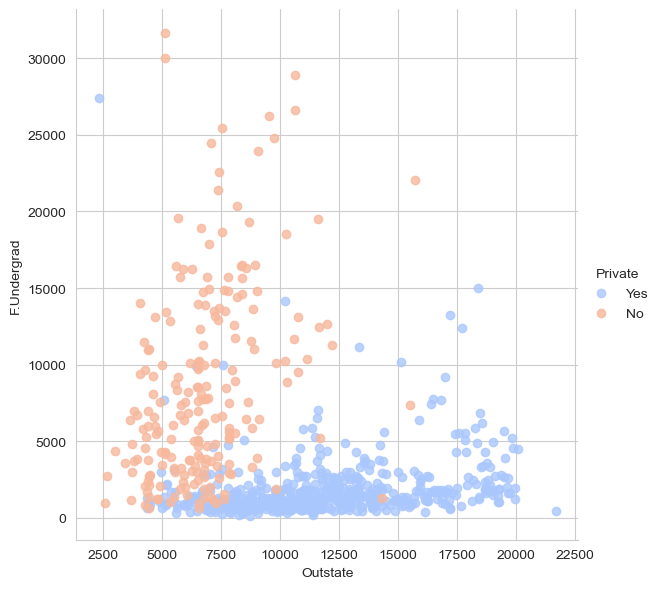

In [50]:
#Creating scatterplot of F.Undergrad vs Outstate
sns.set_style('whitegrid')
sns.lmplot(x='Outstate',y='F.Undergrad',data=college_df, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)


Text(0.5, 1.0, 'Histogram showing, whether students are from private college or not')

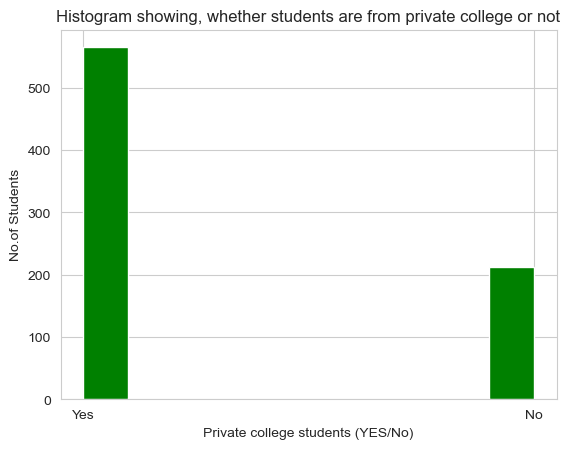

In [51]:
#plotting histogram 
plt.hist(college_df['Private'], range=('Yes', 'No'), color='green', histtype='stepfilled', rwidth='0.7')
plt.xlabel('Private college students (YES/No)')
plt.ylabel("No.of Students")
plt.title("Histogram showing, whether students are from private college or not")

Text(0.5, 1.0, 'Count plot showing whether students are from private college or not')

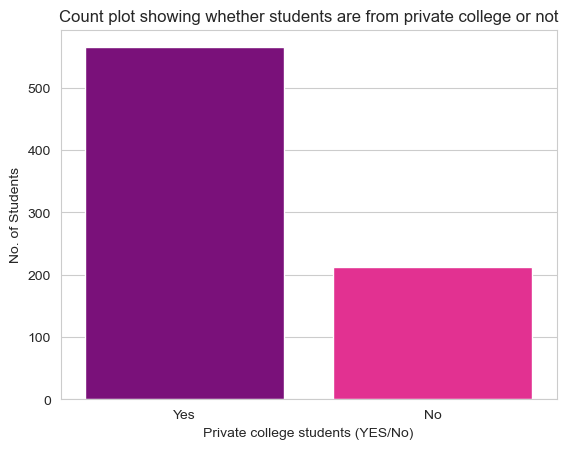

In [52]:
#Count plot to visualize the distribution of private vs non-private colleges
sns.countplot(x='Private', data=college_df,  palette=['#8B008B', '#FF1493'])
plt.xlabel('Private college students (YES/No)')
plt.ylabel("No. of Students")
plt.title("Count plot showing whether students are from private college or not")


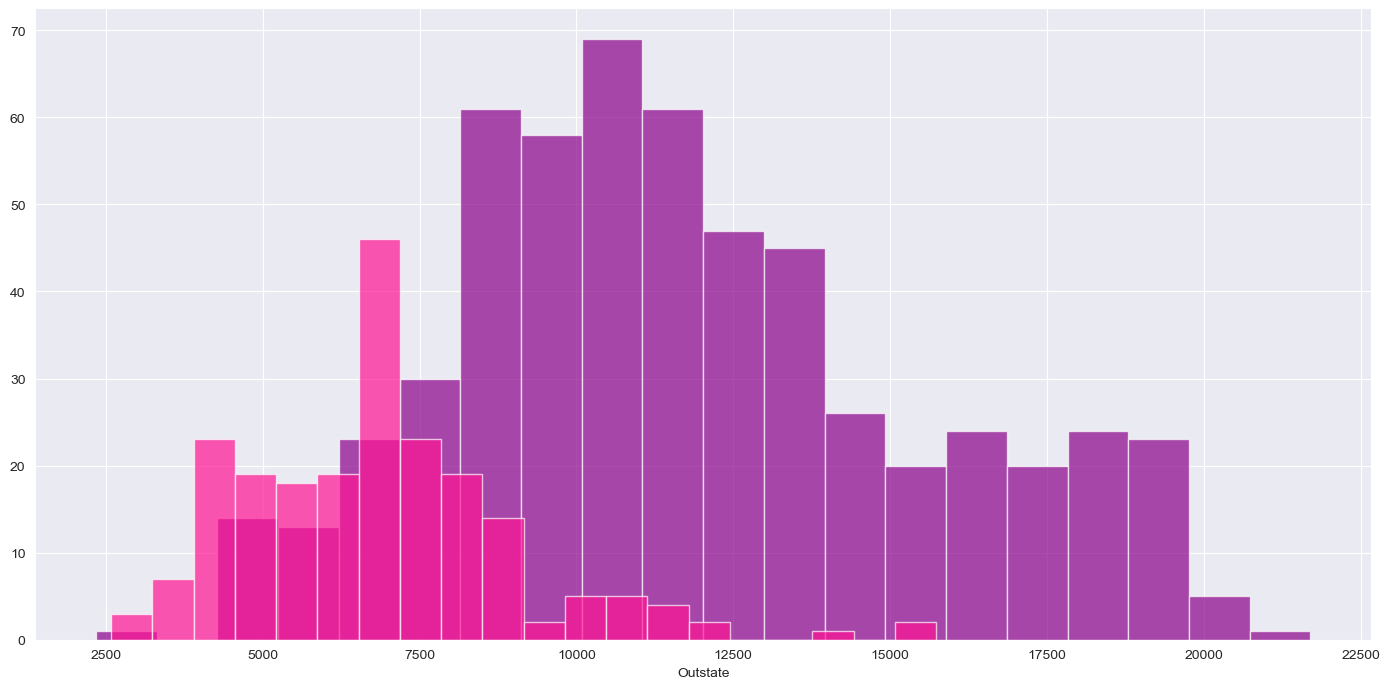

In [53]:
#creating a FacetGrid with a histogram overlaid for a numerical variable, 'Outstate', colored by a categorical variable, 'Private'.
sns.set_style('darkgrid')
graph = sns.FacetGrid(college_df, hue = 'Private', palette=['#8B008B', '#FF1493'], height=7, aspect=2)
graph = graph.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

Text(0.5, 0.98, 'Distribution of Out-of-State Tuition by College Type')

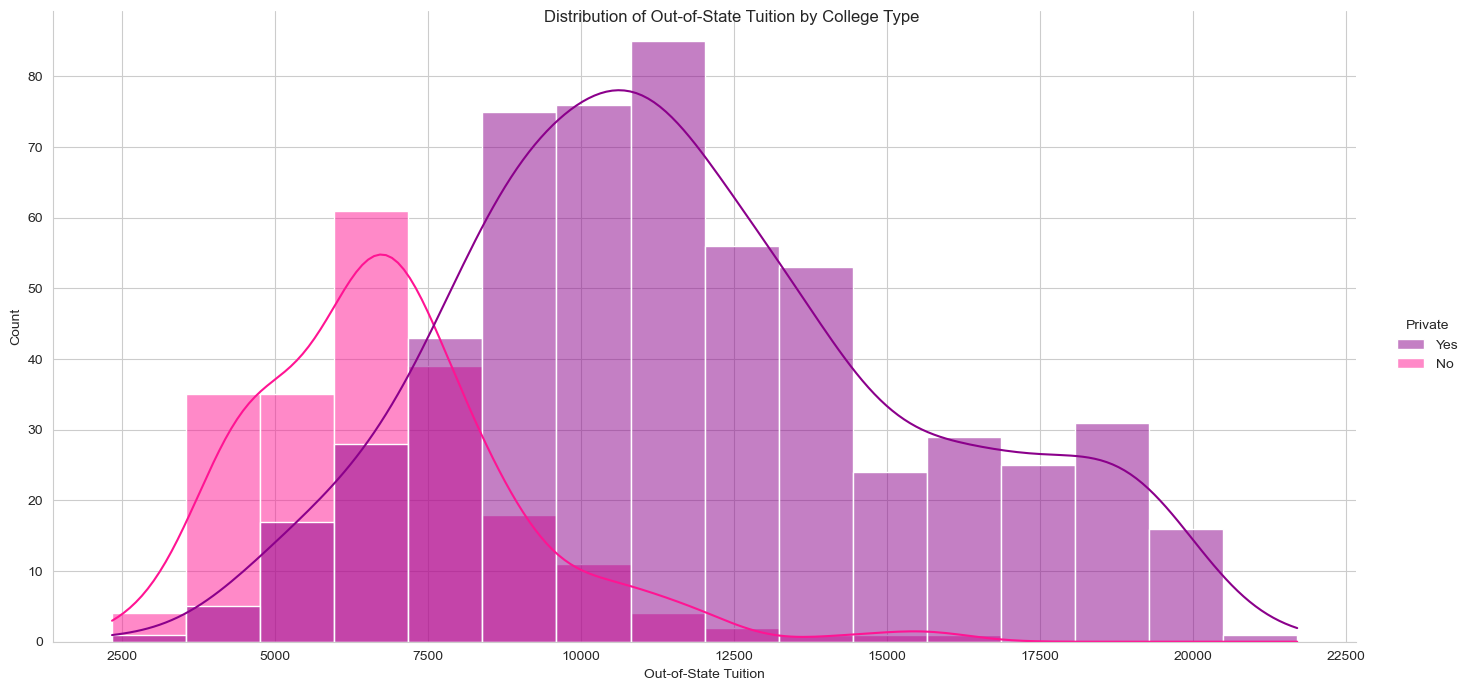

In [25]:
sns.set_style('whitegrid')
g = sns.displot(data=college_df, x='Outstate', hue='Private', kde=True, height=7, aspect=2,  palette=['#8B008B', '#FF1493'])
g.set_axis_labels("Out-of-State Tuition", "Count")
g.fig.suptitle("Distribution of Out-of-State Tuition by College Type")

Text(0.5, 0.98, 'Distribution of Out-of-State Tuition by College Type')

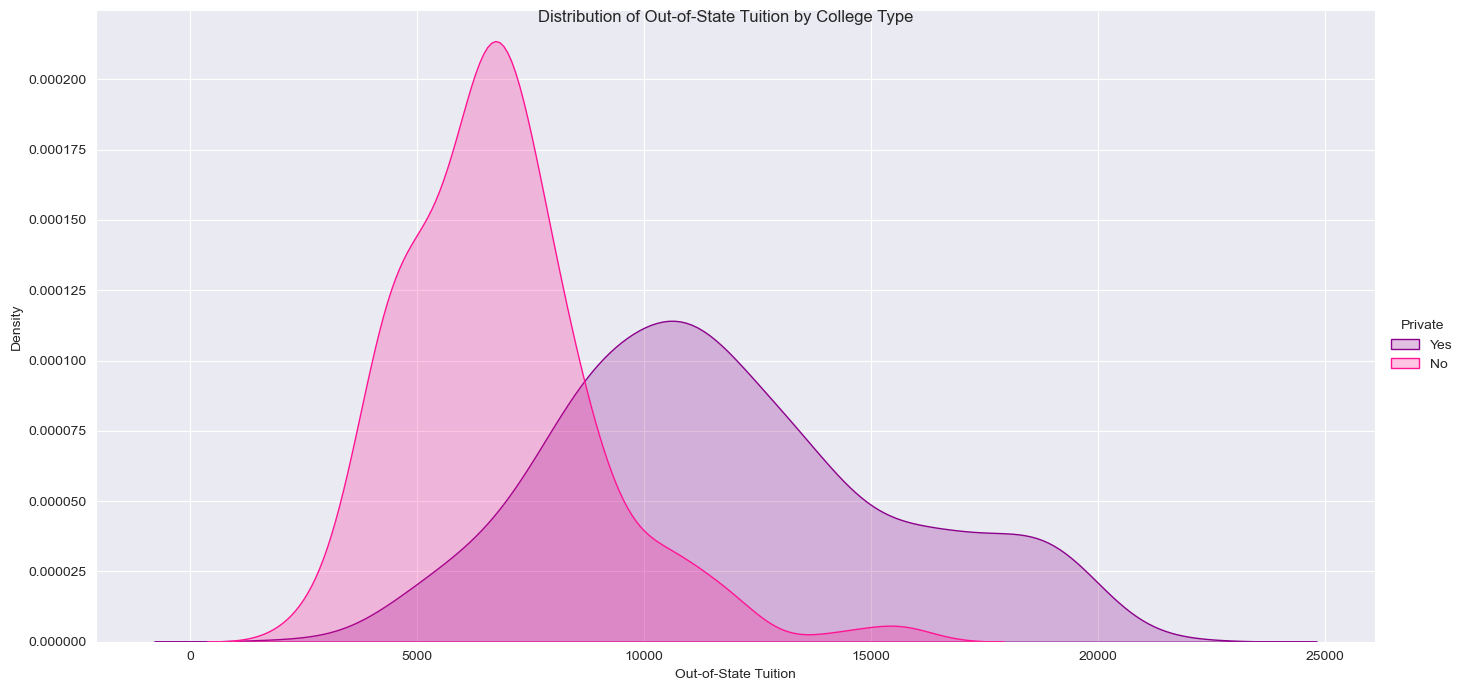

In [54]:
graph = sns.FacetGrid(college_df, hue='Private',  palette=['#8B008B', '#FF1493'], height=7, aspect=2)
graph.map(sns.kdeplot, 'Outstate', shade=True)
graph.add_legend()
graph.set_axis_labels("Out-of-State Tuition", "Density")
graph.fig.suptitle("Distribution of Out-of-State Tuition by College Type")

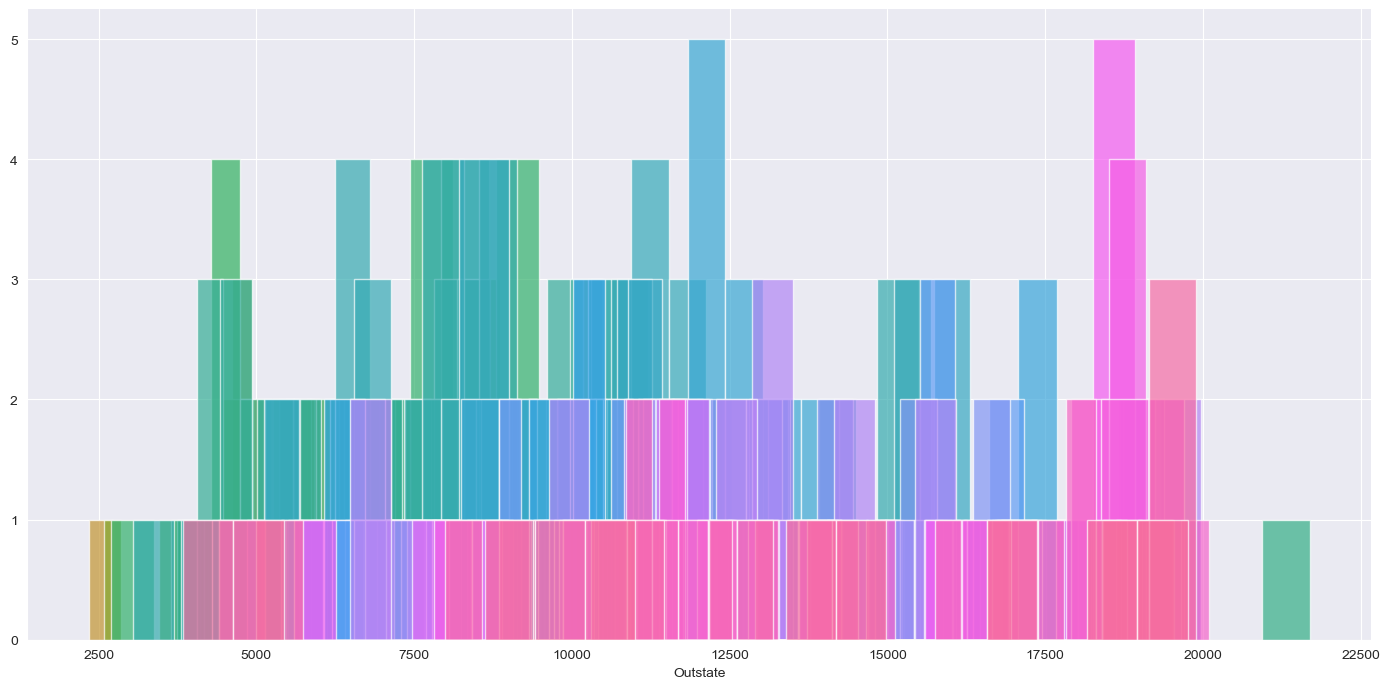

In [55]:
#creating a FacetGrid with a histogram overlaid for a numerical variable, 'Outstate', colored by a categorical variable, 'Grad.Rate'.
sns.set_style('darkgrid')
graph = sns.FacetGrid(college_df, hue = 'Grad.Rate', palette='husl', height=7, aspect=2)
graph = graph.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

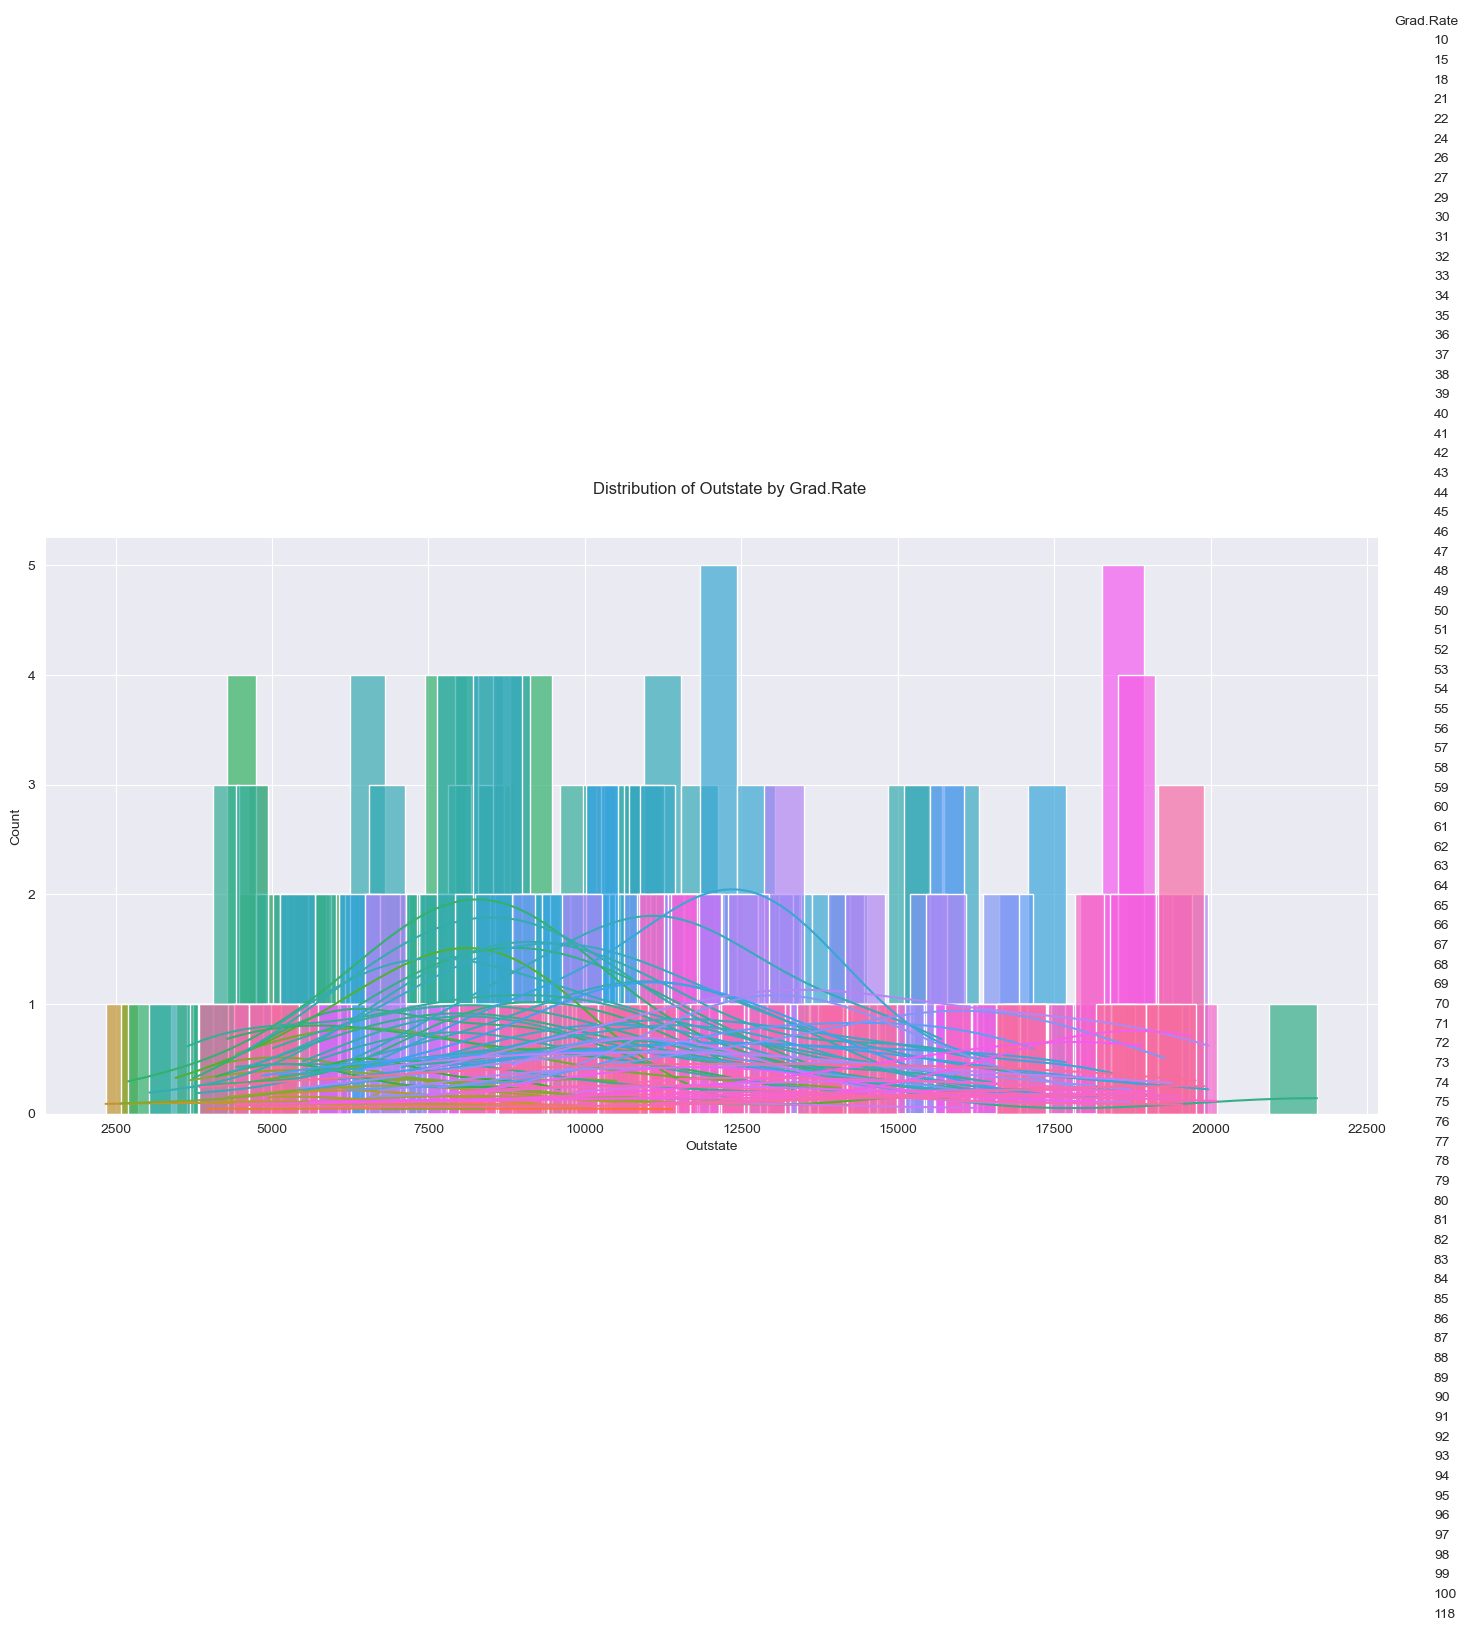

In [58]:
#This college has graduation rate highter than 100.
# college_df[college_df['Grad.Rate'] > 100]
#As Grad.Rate can't be higher than 100, so setting it to 100.
college_df.loc['Cazenovia College', 'Grad.Rate'] = 100


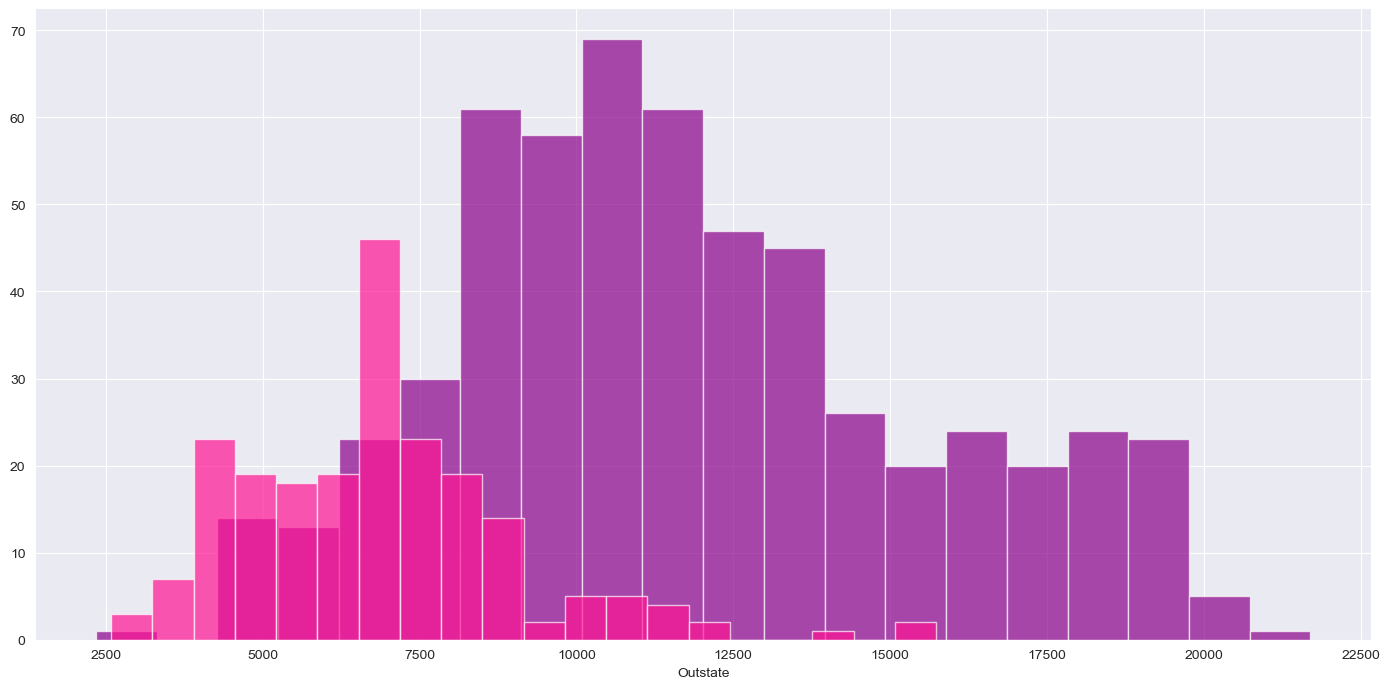

In [60]:
#After remodifying the data, the graph is as shown.
#creating a FacetGrid with a histogram overlaid for a numerical variable, 'Outstate', colored by a categorical variable, 'Private'.
sns.set_style('darkgrid')
graph = sns.FacetGrid(college_df, hue = 'Private', palette=['#8B008B', '#FF1493'], height=7, aspect=2)
graph = graph.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

In [61]:
# Creating K-Means Cluster for above data.
from sklearn.cluster import KMeans

# Instantiate a KMeans object with the desired number of clusters = 2
kmeans = KMeans(n_clusters=2)

# Fit the KMeans object to the college_df dataframe by dropping the 'Private' column
kmeans.fit(college_df.drop('Private', axis=1))


KMeans(n_clusters=2)

In [62]:
#center for the clusters.
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [74]:
#creating clusters, 1 for Private school, and 0 for a public school
def converter_for_college(cluster):
    if cluster =='Yes':
        return 1
    else:
        return 0
college_df['Cluster'] = college_df['Private'].apply(converter_for_college)
college_df.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [78]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(college_df['Cluster'], kmeans.labels_))
print(classification_report(college_df['Cluster'], kmeans.labels_))


[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



TypeError: scatter() missing 1 required positional argument: 'y'

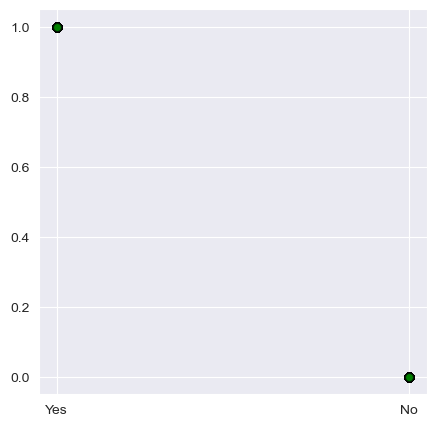

In [79]:
fig = plt.figure(figsize=(5,5))
plt.scatter(x=college_df['Private'], y=college_df['Cluster'], color = 'green', alpha=0.5, edgecolors='k')
centroids= kmeans.cluster_centers_
for i in centroids:
    plt.scatter(i[0], color = 'green')
plt.xlim(0.80)
plt.ylim(0.80)
# plt.show()
centroids

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



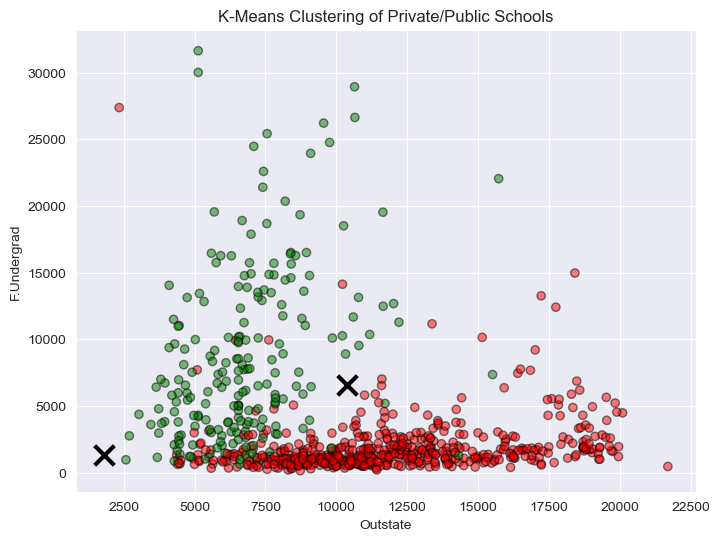

In [98]:

# Instantiate a KMeans object with the desired number of clusters = 2
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans object to the college_df dataframe by dropping the 'Private' column
kmeans.fit(college_df.drop('Private', axis=1))

# Creating clusters, 1 for Private school, and 0 for a public school
college_df['Cluster'] = np.where(college_df['Private'] == 'Yes', 1, 0)

# Creating confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(college_df['Cluster'], kmeans.labels_))
print(classification_report(college_df['Cluster'], kmeans.labels_))

# Visualizing the clusters
fig, ax = plt.subplots(figsize=(8,6))
colors = np.array(['green', 'red'])
ax.scatter(x=college_df['Outstate'], y=college_df['F.Undergrad'], c=colors[college_df['Cluster']], alpha=0.5, edgecolors='k')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='black')
ax.set_xlabel('Outstate')
ax.set_ylabel('F.Undergrad')
ax.set_title('K-Means Clustering of Private/Public Schools')
plt.show()


In [88]:
# predicting from the given new dataframe whether, the college is private or not
new_college = pd.DataFrame({
    'Apps': [5000],
    'Accept': [3500],
    'Enroll': [2800],
    'Top10perc': [25],
    'Top25perc': [50],
    'F.Undergrad': [1000],
    'P.Undergrad': [500],
    'Outstate': [15000],
    'Room.Board': [5000],
    'Books': [450],
    'Personal': [1000],
    'PhD': [70],
    'Terminal': [78],
    'S.F.Ratio': [12],
    'perc.alumni': [15],
    'Expend': [10000],
    'Grad.Rate': [80]
})


In [91]:
# adding the missing feature "Cluster" to new_college and assign it a value of 0
new_college['Cluster'] = 0

# making the prediction using the KMeans model
prediction = kmeans.predict(new_college)

# check the prediction and print the result
if prediction == 1:
    print('This college is a private school.')
else:
    print('This college is not a private school.')


This college is not a private school.
